<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/atividade3/atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Média Móvel

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

###A. 
- No Python (Numpy/Scipy), implemente com a função `scipy.signal.lfilter` um sistema média móvel de duas amostras. Considere a entrada `x=[10,3,−3,3,8,1,−2]`.
___

In [2]:
x = [10, 3, -3, 3, 8, 1, -2]
input = np.array(x)
a = [1]
b = [0.5, 2]

[ 5.  21.5  4.5 -4.5 10.  16.5  1. ]


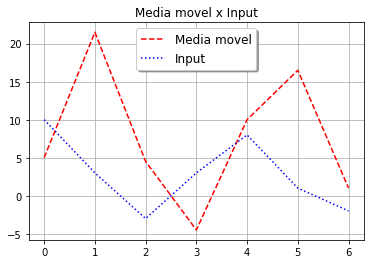

In [14]:
#lfilter: filter data along one-dimension with an IIR or FIR filter
media_movel = signal.lfilter(b, a, input)
print(media_movel)
fig, ax = plt.subplots()
ax.plot(media_movel, "r--", label = "Media movel")
ax.plot(input, "b:", label = "Input")
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.grid()
plt.title('Media movel x Input')
plt.show()


###B. 
- Verifique se a saída está correta (faça o cálculo manualmente). Foi por esse motivo que usamos um sinal  x(n)  simples, para calcular a saída manualmente e ter certeza que a implementação está correta.
___

Equção implementada pelo lfilter: `b[0]*x[n] + b[1]*x[n-1]`
- y(0) = b(0)*x(0)+b(1)*x(-1) = 0.5*10+2*0 = 0.5
- y(1) = b(0)*x(1)+b(1)*x(1-1) = 0.5*3+2*10 = 21.5
- y(2) = b(0)*x(2)+b(1)*x(2-1) = 0.5*(-3)+2*3 = 4.5
- y(3) = b(0)*x(3)+b(1)*x(3-1) = 0.5*3+2*(-3) = -.4
- y(4) = b(0)*x(4)+b(1)*x(4-1) = 0.5*8+2*3 = 10
- y(5) = b(0)*x(5)+b(1)*x(5-1) = 0.5*1+2*8 = 16.5
- y(6) = b(0)*x(6)+b(1)*x(6-1) = 0.5*(-2)+2*1 = 1

###C. 
- Verifique com a função `scipy.signal.freqz` a resposta em frequência do sistema. Que tipo de filtro é o sistema média móvel? Qual a sua frequência de corte, em Hz, considerando uma frequência de amostragem de 44100 Hz?

- Confira se o resultado está correto fazendo também de forma analítica. Anexe uma foto com seu cálculo. Para isso, lembre que a frequência de corte de um filtro é aquela em que a magnitude de  `H(z)`  é  1/√2 . Você já tem a resposta em frequência (olhe no vídeo). Obtenha a magnitude, depois iguale a 1/√2  e isole a frequência.
___

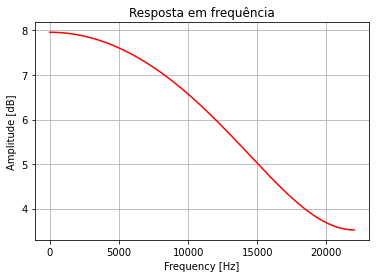

In [11]:
#freqz: 
f2w = 2*np.pi
fs,h = signal.freqz(b, fs=f2w*44100)
plt.plot(fs/(f2w), 20*np.log10(abs(h)), "r")
plt.grid()
plt.title('Resposta em frequência')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.show() 


###D.
- Um tom senoidal puro de 17 kHz, amplitude de pico de 1,5 V, amostrado a 44,1 kHz, é aplicado à entrada do sistema média móvel de 2 amostras. Qual o sinal de saída (tipo, frequência e amplitude)? Mostre.
___

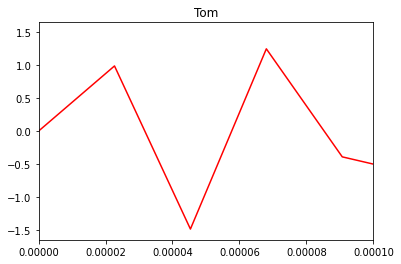

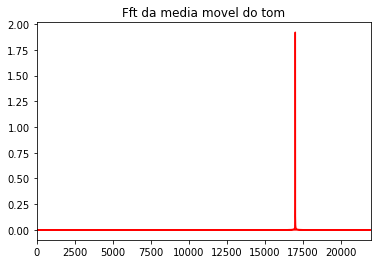

In [27]:
f = 17000
fs= 44100
amplitude = 1.5
k = np.linspace(0,1, fs)
tom = amplitude*(np.sin(f2w*17000*k))
plt.xlim(0,0.0001)
plt.plot(k,tom,"r")
plt.title('Tom')
plt.show()

media_movel_tom = signal.lfilter(b,a,tom)

fft_media_movel_tom = np.fft.fft(media_movel_tom)
n = fft_media_movel_tom.size
freq = np.fft.fftfreq(n, 1/fs)
plt.xlim(0,22000)
plt.plot(freq,abs(fft_media_movel_tom)*2/fs, "r")
plt.title('Fft da media movel do tom')
plt.show()


###E. 
- Com zplane (baixar de https://www.dsprelated.com/showcode/244.php), onde estão localizadas as singularidades (polos e zeros) no domínio Z do sistema média móvel de 2 amostras?
___


###F. 
-Ainda no Python, implemente uma média móvel com quatro amostras. Há um efeito de suavização na saída?
___

###G. 
- Verifique a resposta em frequência do sistema com freqz. Qual a diferença em relação ao sistema de 2 amostras?
___

###H. 
- Gere um sinal sweep no Ocenaudio (ou gere diretamente no Python) e grave em formato wav. Leia o arquivo no Python e use como entrada da média móvel com 4 amostras. Grave a saída, abra no Ocenaudio e observe a saída no tempo e no domínio da frequência. O resultado é condizente com o esperado no item G? Mostre.
___